<a href="https://colab.research.google.com/github/Rushabhtikale92/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Rushabh_Tikale_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

Inviting the library for Kaggle party.

In [ ]:
# Importing the library.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
data = pd.read_csv("/content/drive/MyDrive/CSV/SeoulBikeData.csv", encoding= 'unicode_escape') 

In [ ]:
# Presenting the sample 
data.head()

,Date,Rented Bikes,Humidity,wind speed,Dew point temperature,Solar Radiation,Rainfall,snowfall,Functioning Day,year,day,solar_radition,snowf,rainfall,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day name_Friday,day name_Monday,day name_Saturday,day name_Sunday,day name_Thursday,day name_Tuesday,day name_Wednesday,week_weekday,week_weekend,month name_April,month name_August,month name_December,month name_February,month name_January,month name_July,month name_June,month name_March,month name_May,month name_November,month name_October,month name_September
0,2017-12-01,254,37,2.2,-17.6,0.0,0.0,0.0,1,2017,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2017-12-01,204,38,0.8,-17.6,0.0,0.0,0.0,1,2017,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2017-12-01,173,39,1.0,-17.7,0.0,0.0,0.0,1,2017,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2017-12-01,107,40,0.9,-17.6,0.0,0.0,0.0,1,2017,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2017-12-01,78,36,2.3,-18.6,0.0,0.0,0.0,1,2017,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


# Rename the feature as new feature

In [ ]:
column_dict = {'Date':'Date', 'Rented Bike Count':'Rented Bikes', 'Hour':'Hour', 'Temperature(°C)':'Temperature', 'Humidity(%)':'Humidity', 'Wind speed (m/s)':'wind speed', 'Visibility (10m)':'visibility', 
               'Dew point temperature(°C)':'Dew point temperature','Solar Radiation (MJ/m2)':'Solar Radiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)': 'snowfall'}
data.rename(columns= column_dict, inplace=True)

# Checking For NaN Values

In [ ]:
data.columns[data.isna().any()]

Index([], dtype='object')

Converting the data into easy and convenient form so we can easily deal with the robust data and more comfortable to predict for future model



In [ ]:
data['Date'] = data['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['month name'] = data['Date'].dt.month_name()
data['day'] = data['Date'].dt.day
data['day name'] = data['Date'].dt.day_name()

In [ ]:
data['week'] = data['day name'].apply(lambda x: "weekend" if x=='Saturday' or x == 'Sunday' else 'weekday')

As we seperate the date feature into various form like month, year, month name, day name so we dont required to move with repeated data as our moto is analyse with data and prepared for more convertable.

In [ ]:
# Droping the date feature
data.drop(columns= ['Date'], inplace=True)

In [ ]:
data.head()

,Rented Bikes,Hour,Temperature,Humidity,wind speed,visibility,Dew point temperature,Solar Radiation,Rainfall,snowfall,Seasons,Holiday,Functioning Day,year,month,month name,day,day name,week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bikes           8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   wind speed             8760 non-null   float64
 5   visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning Day        8760 non-null   object 
 13  year                   8760 non-null   int64  
 14  month                  8760 non-null   int64  
 15  mont

In [ ]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

From the above snippets we can easily understand what the data has trying to say. It gives us the clear intuition about each feature so by reading this we can easily predict the present data in the large feature



In [ ]:
data.columns

Index(['Rented Bikes', 'Hour', 'Temperature', 'Humidity', 'wind speed',
       'visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall',
       'snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'month name', 'day', 'day name', 'week'],
      dtype='object')

## Exploring Dependent Variable

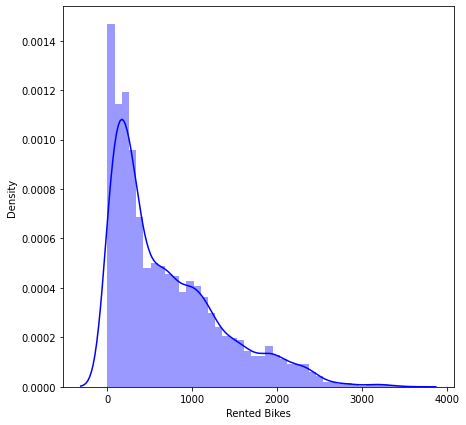

In [ ]:
# Dependent variable 'Rented Bike count'. 
plt.figure(figsize=(7,7))                   
sns.distplot(data['Rented Bikes'],color="b")

# Exploring Independent Variable

Checking the independent variable is uniformly distributed.

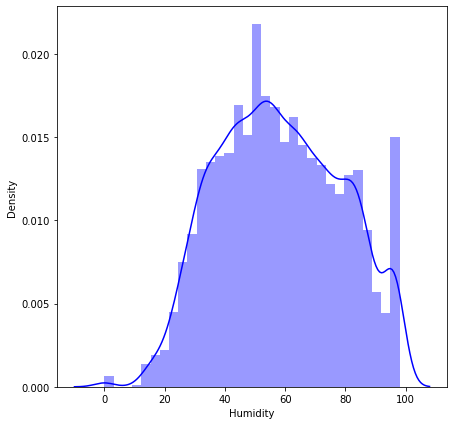

In [ ]:
# Checking independent variable "humidity"
plt.figure(figsize=(7,7))                   
sns.distplot(data['Humidity'],color="b")

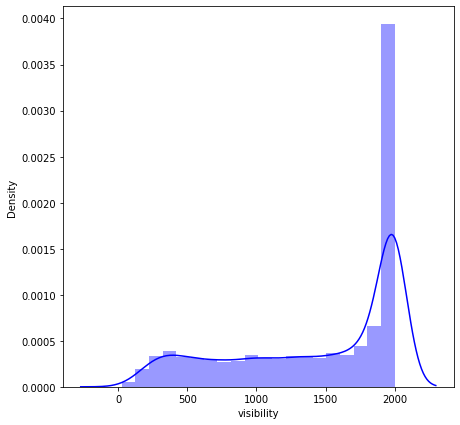

In [ ]:
# Checking independent variable "Visibility"
plt.figure(figsize=(7,7))                   
sns.distplot(data['visibility'],color="b")

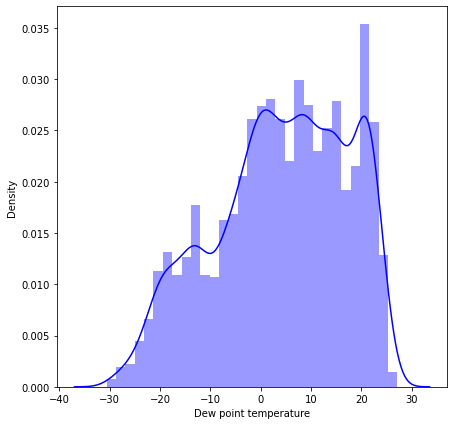

In [ ]:
# Checking independent variable "Dew point temperature"
plt.figure(figsize=(7,7))                   
sns.distplot(data['Dew point temperature'],color="b")

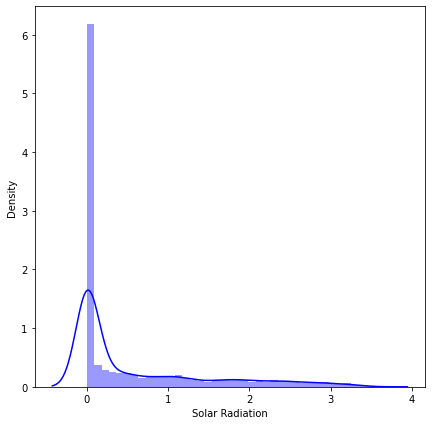

In [ ]:
# Checking independent variable "Visibility"
plt.figure(figsize=(7,7))                   
sns.distplot(data['Solar Radiation'],color="b")

In [ ]:
data.describe()

,Rented Bikes,Hour,Temperature,Humidity,wind speed,visibility,Dew point temperature,Solar Radiation,Rainfall,snowfall,year,month,day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2017.915068,6.526027,15.720548
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.278796,3.448048,8.796749
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,7.000000,16.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018.000000,10.000000,23.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,12.000000,31.000000


# Checking For Outliers

We need to work with outliers as it is the very most important part for preparing data and come up with the good accuracy of the model. When we see above we get to know that dependent variable has outliers so we just try to remove it.

In [ ]:
# Variables neet to be checked for outliers
dependent_variables = 'Rented Bikes'

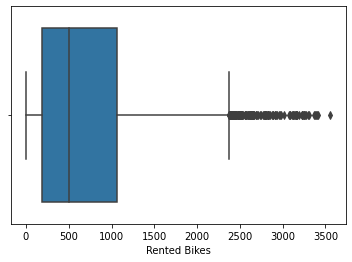

In [ ]:
# Checking the variables with outliers
sns.boxplot(data['Rented Bikes']) 

In [ ]:
# Removing outliers using IQR
first_quartile = data['Rented Bikes'].quantile(0.25)
third_quartile = data['Rented Bikes'].quantile(0.75)
IQR = third_quartile - first_quartile
new_boundary = 1.5 + 3*IQR
data.drop(data[data['Rented Bikes']>new_boundary].index,axis = 0,inplace = True)
data.shape

(8687, 19)

In [ ]:
data.columns

Index(['Rented Bikes', 'Hour', 'Temperature', 'Humidity', 'wind speed',
       'visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall',
       'snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'month name', 'day', 'day name', 'week'],
      dtype='object')

In [ ]:
numerical_columns = ['Rented Bikes','Temperature','Humidity','wind speed','visibility','Solar Radiation','Rainfall','snowfall']
categorical_columns = ['Hour','day','Seasons','Holiday', 'Functioning Day', 'year','month','week']

In [ ]:
# Create a list of independent variables 
independent_variables = list(set(data.columns.tolist()) - {dependent_variables})
independent_variables

['Functioning Day',
 'Solar Radiation',
 'month',
 'day',
 'Hour',
 'Holiday',
 'year',
 'snowfall',
 'Rainfall',
 'month name',
 'visibility',
 'day name',
 'Seasons',
 'wind speed',
 'Temperature',
 'week',
 'Dew point temperature',
 'Humidity']

# Visualising rented bikes per hour

Text(0.5, 0, 'Hour')

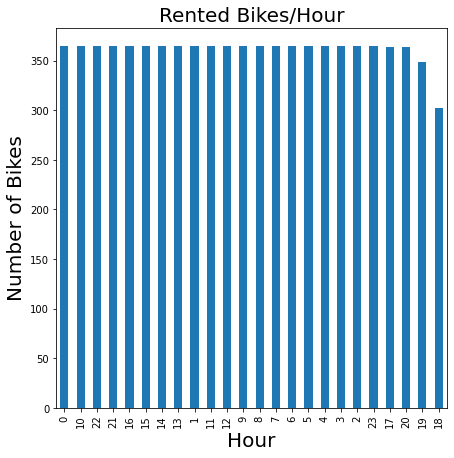

In [ ]:
data = data['Hour'].value_counts()
plt.figure(figsize=(7,7))
data.plot(kind='bar')
plt.title('Rented Bikes/Hour',fontsize=20)
plt.ylabel('Number of Bikes',fontsize=20)
plt.xlabel('Hour',fontsize=20)

From the above graph we can see as there almost same bikes are rented per hour only the night time the rented bikes are less.

Dataset contain holiday?

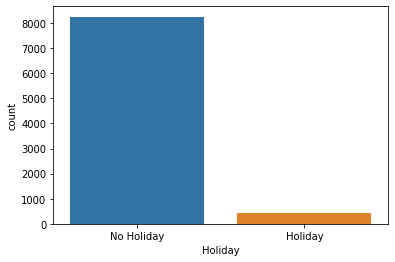

In [ ]:
sns.countplot(data['Holiday'])

From the above data almost dataset contains "No Holiday features " and some of only are"Holiday"



#  Types of Seaseon

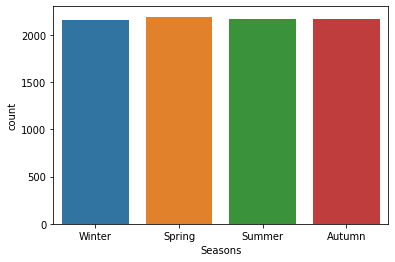

In [ ]:
sns.countplot(data['Seasons'])

From the above plot we are come up with the result that dataset contain four season information each are having almost same.



The day is functioning?

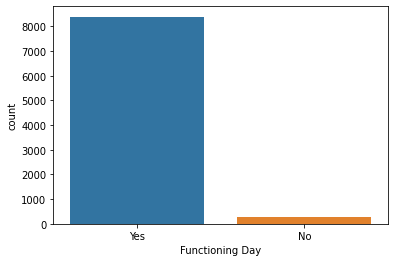

In [ ]:
sns.countplot(data['Functioning Day'])

Yes has 98 percent dataset and No has ony 2 percent

# Relation between dependent and independent variable

The relation between dependent and independent variable gives us the major impact on understanding the variation accordance with independent variable

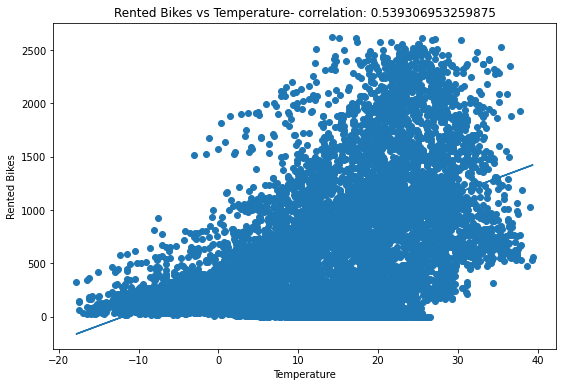

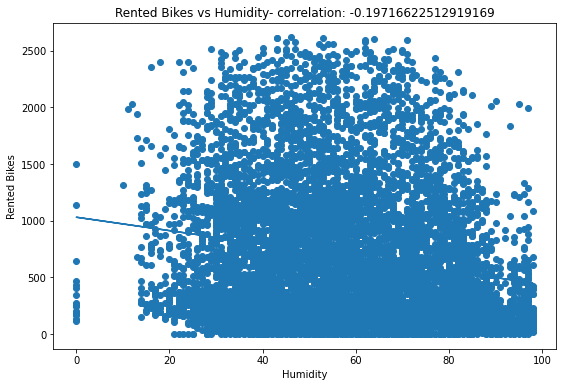

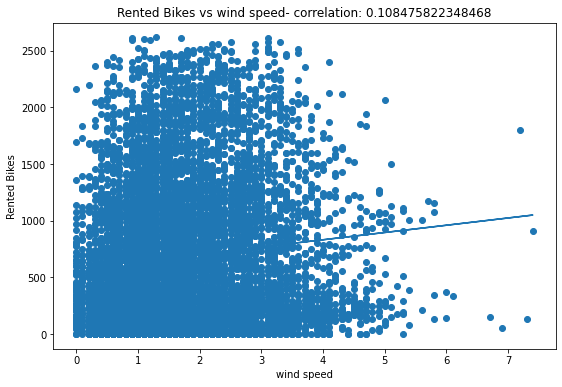

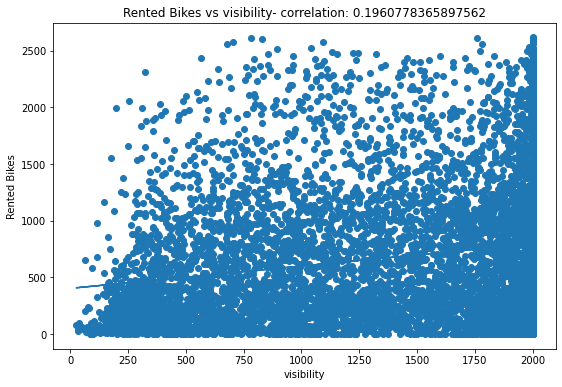

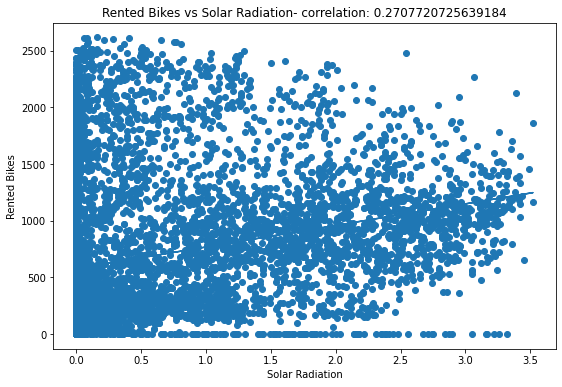

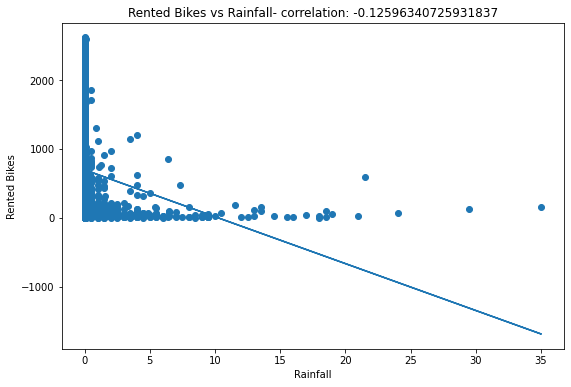

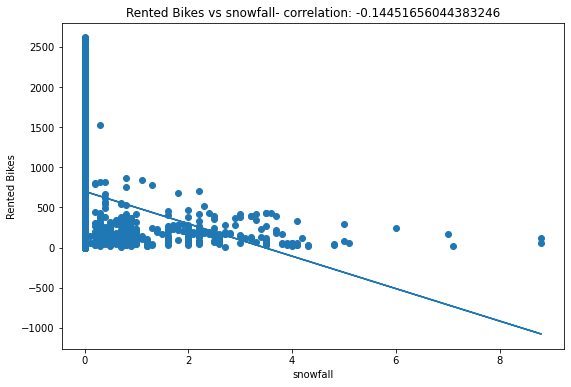

In [ ]:
for col in numerical_columns[1:]: 
    fig = plt.figure(figsize=(9, 6)) 
    ax = fig.gca()  
    feature = data[col] 
    label = data['Rented Bikes']
    correlation = feature.corr(label) 
    plt.scatter(x=feature, y=label)  
    plt.xlabel(col) 
    plt.ylabel('Rented Bikes') 
    ax.set_title('Rented Bikes vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Rented Bikes'], 1)
    y_hat = np.poly1d(z)(data[col])
    plt.plot(data[col], y_hat)
plt.show()

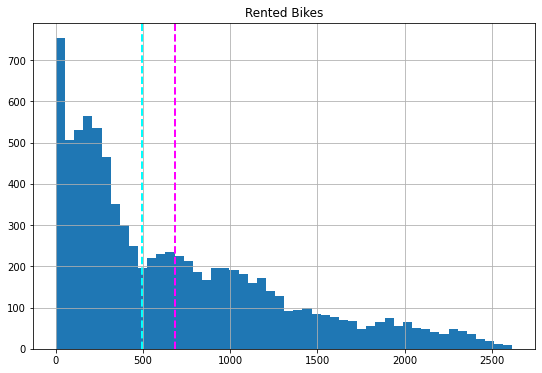

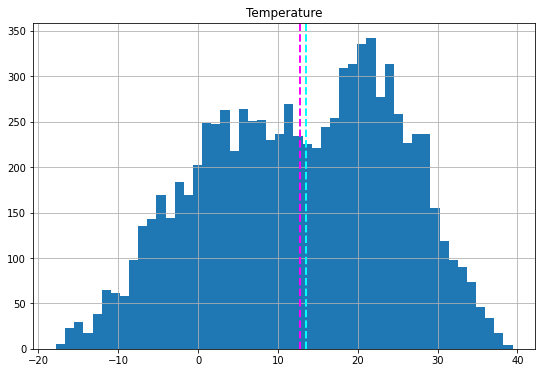

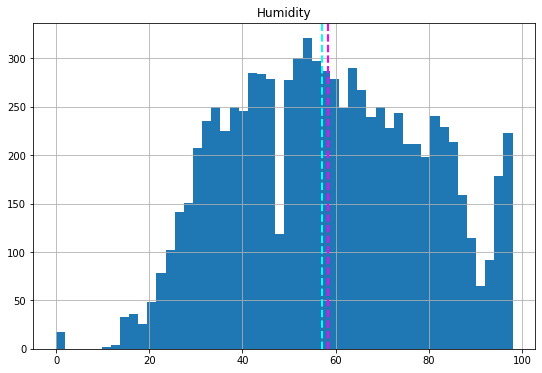

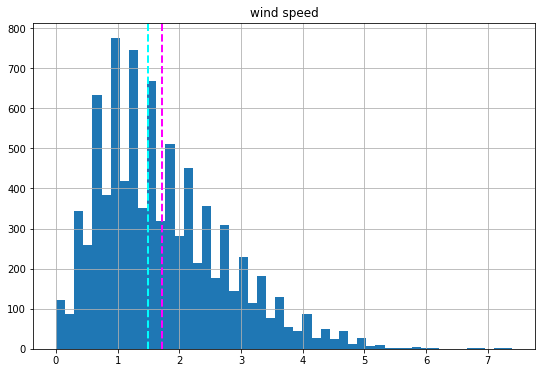

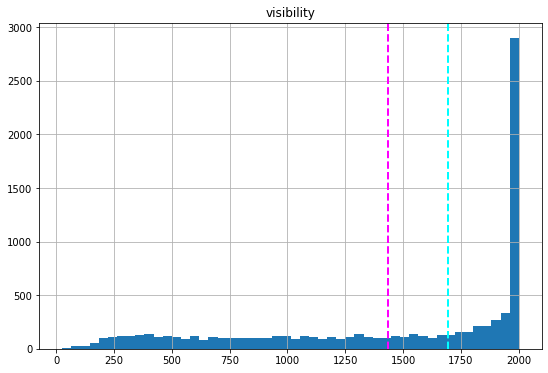

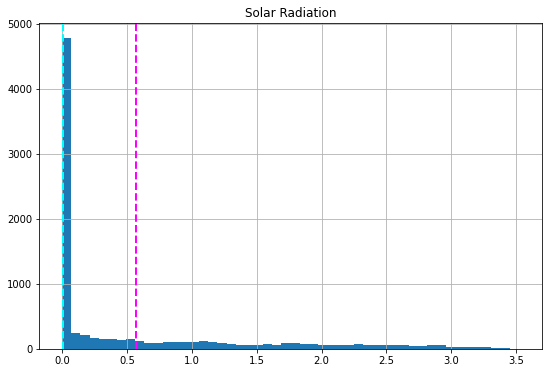

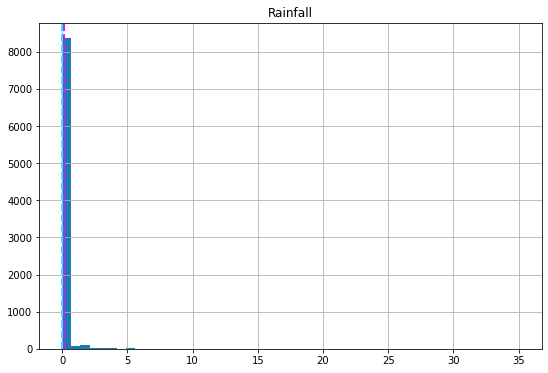

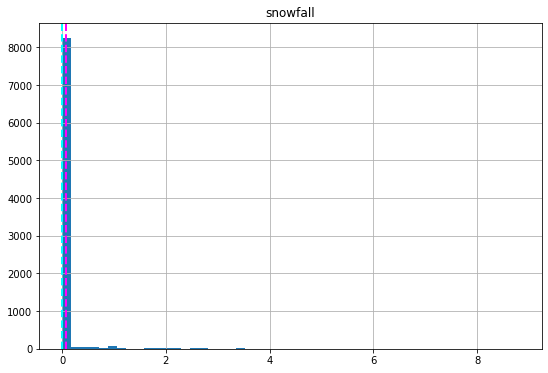

In [ ]:
# plot a bar plot for each numerical feature count

for col in numerical_columns[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

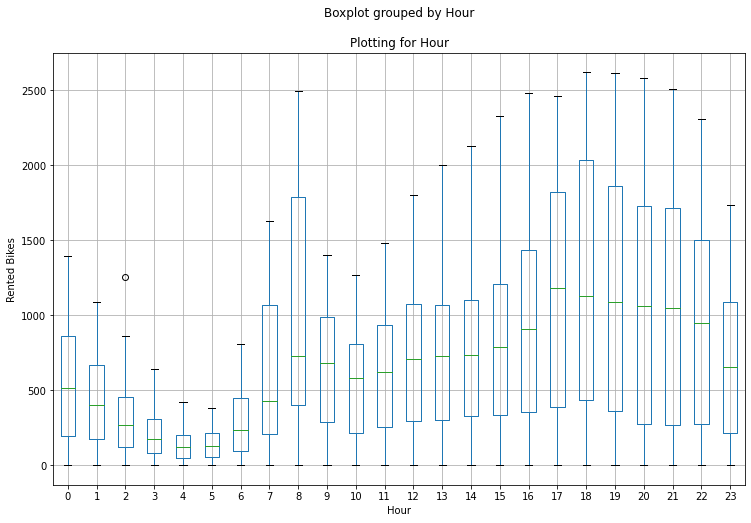

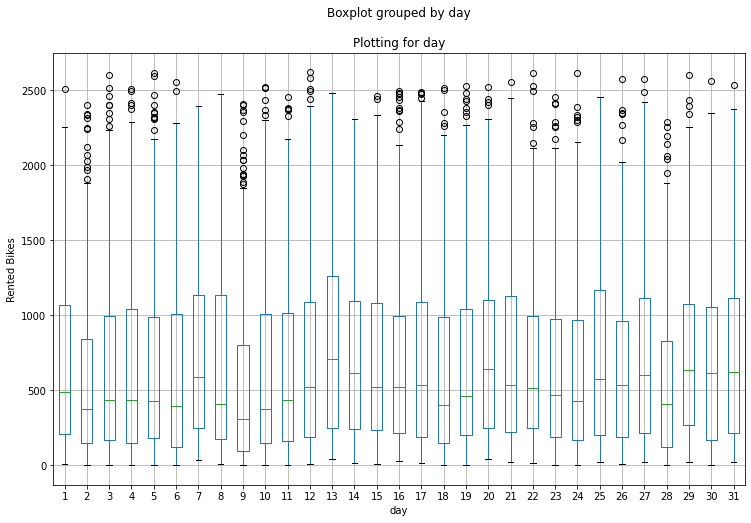

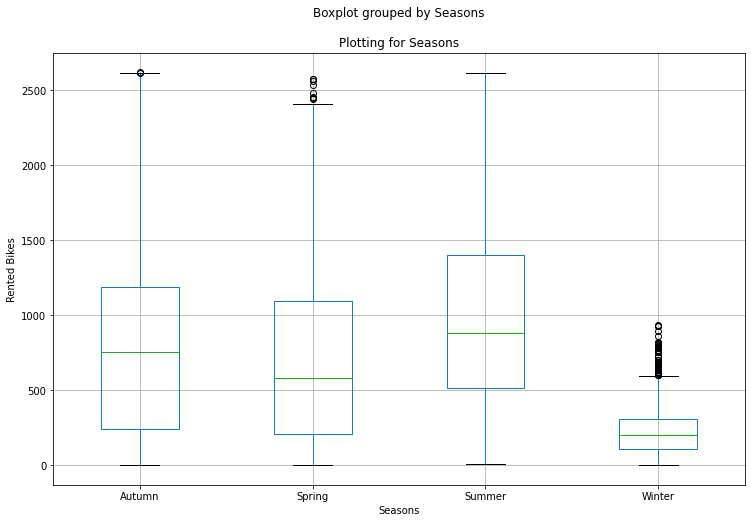

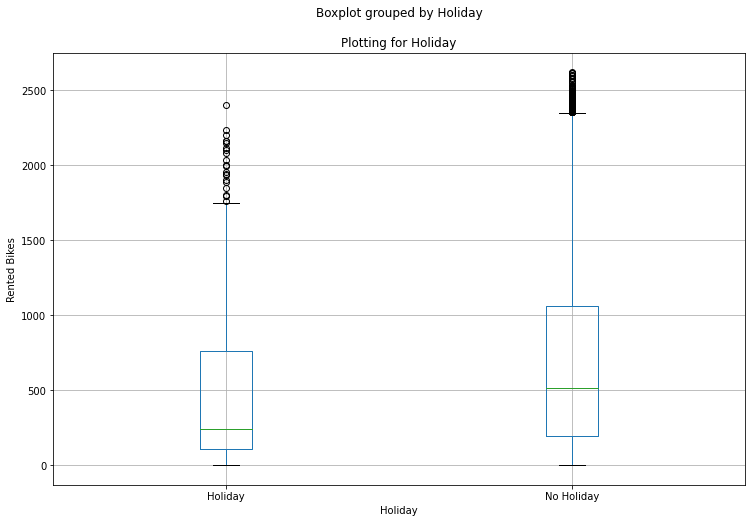

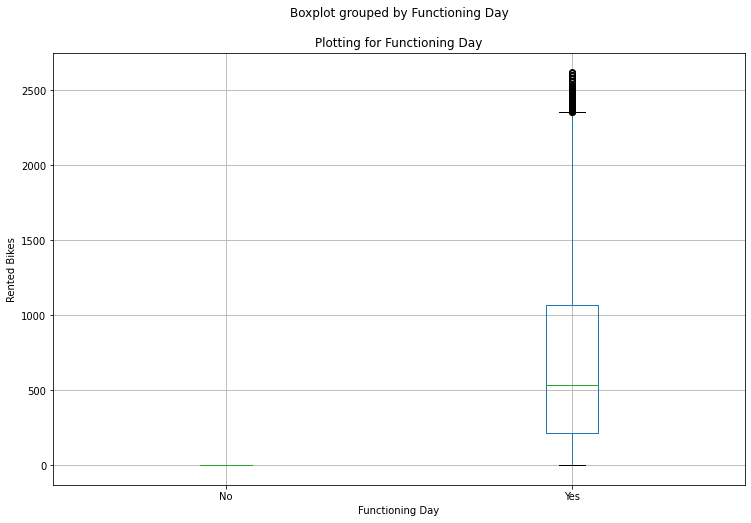

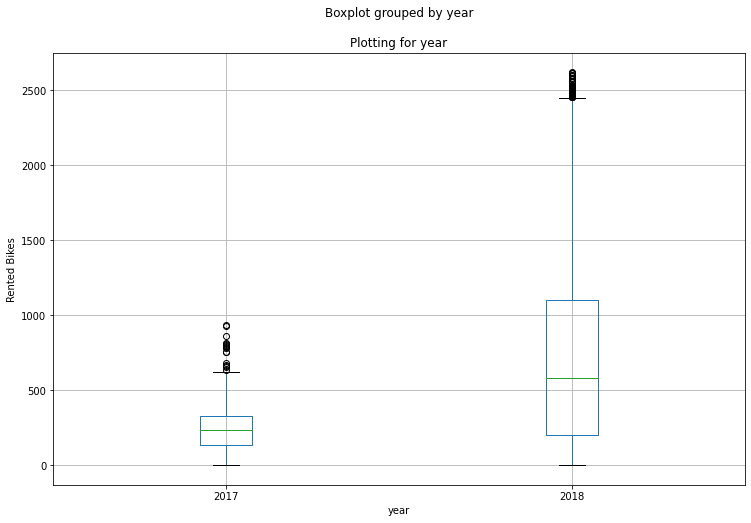

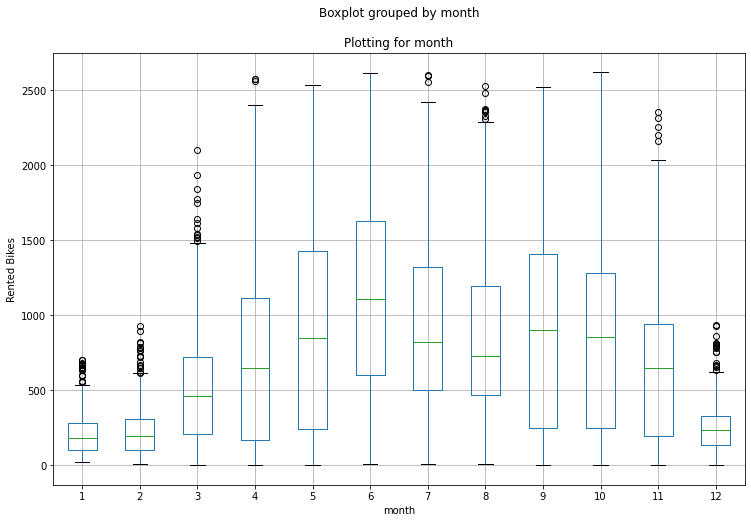

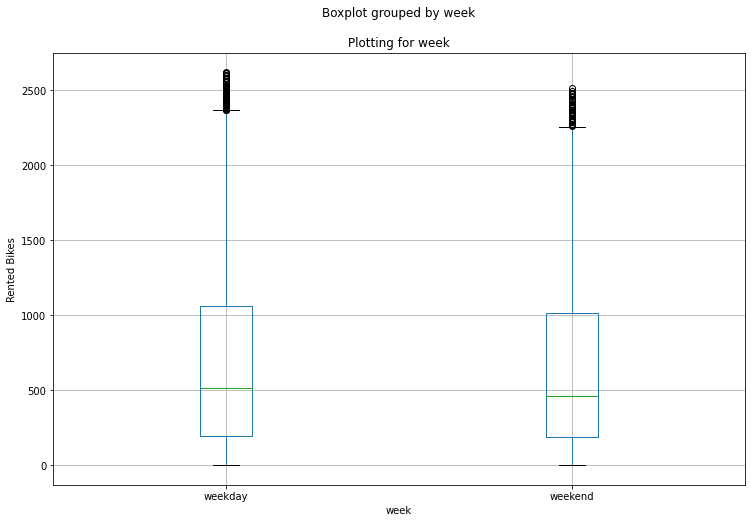

In [ ]:
# plot a boxplot for the label by each categorical feature  
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    data.boxplot(column = 'Rented Bikes', by = col, ax = ax)
    ax.set_title('Plotting for ' + col)
    ax.set_ylabel("Rented Bikes")
plt.show()

# Correlation in Variables

Highly correlation in data makes us so many problem so we try to check and remove the high correlation dataset. Correlational data is that deling with duplicates data so we try to remove it and trying to not deal with repeated data.

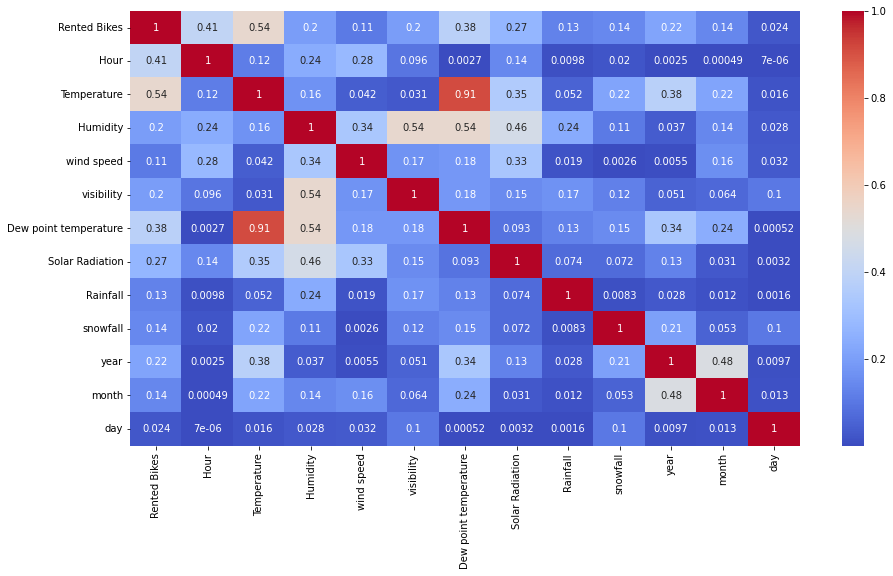

In [ ]:
# Checking for Correlation in dataset
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Droping the column with high correlation, as we checking the above data we are getting to know visibilty and humidity are highly correlatable and temperature and rented bikes are highly correlatable. So we just remove one of them.



In [ ]:
data.drop(columns= ['Temperature','visibility'], inplace=True)

In [ ]:
data.head()

,Rented Bikes,Hour,Humidity,wind speed,Dew point temperature,Solar Radiation,Rainfall,snowfall,Seasons,Holiday,Functioning Day,year,month,month name,day,day name,week
0,254,0,37,2.2,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,204,1,38,0.8,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,173,2,39,1.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,107,3,40,0.9,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,78,4,36,2.3,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday


Variance inflation factor is the key point to remove collinearity

In [ ]:
# Removing Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF 
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count',]]])

,variables,VIF
0,Rented Bikes,4.242885
1,Hour,4.961033
2,Humidity,29.004428
3,wind speed,4.827430
4,Dew point temperature,3.220186
5,Solar Radiation,2.509322
6,Rainfall,1.108354
7,snowfall,1.155220
8,year,50.273655
9,month,4.994735


From the above data humidity and year has a greater correlation so we have to reduce it.

In [ ]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Humidity','year']]])

,variables,VIF
0,Rented Bikes,3.615801
1,Hour,4.587154
2,wind speed,3.947865
3,Dew point temperature,1.513678
4,Solar Radiation,1.727061
5,Rainfall,1.087069
6,snowfall,1.087508
7,month,3.446808
8,day,3.188402


In [ ]:
data['Functioning Day']  = data['Functioning Day'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
#'visibility','solar_radition', 'rainfall' and 'snowfall' are highly skewed so we will convert them into categorical
data['solar_radition'] = data['Solar Radiation'].apply(lambda x: 0 if x==0.00 else 1)
data['snowf'] = data['snowfall'].apply(lambda x: 0 if x==0.0 else 1)
data['rainfall'] = data['Rainfall'].apply(lambda x: 0 if x==0.0 else 1)

In [ ]:
data.head()

,Date,Rented Bikes,Hour,Humidity,wind speed,Dew point temperature,Solar Radiation,Rainfall,snowfall,Seasons,Holiday,Functioning Day,year,month,month name,day,day name,week,solar_radition,snowf,rainfall
0,2017-12-01,254,0,37,2.2,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday,0,0,0
1,2017-12-01,204,1,38,0.8,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday,0,0,0
2,2017-12-01,173,2,39,1.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday,0,0,0
3,2017-12-01,107,3,40,0.9,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday,0,0,0
4,2017-12-01,78,4,36,2.3,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday,0,0,0


## <b>Preparing data for training and testing

In [ ]:
data = pd.get_dummies(data, columns = ['Hour', 'Seasons', 'Holiday', 'month','day name','week','month name'])
data.head()

,Rented Bikes,Humidity,wind speed,Dew point temperature,Solar Radiation,Rainfall,snowfall,Functioning Day,year,day,solar_radition,snowf,rainfall,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day name_Friday,day name_Monday,day name_Saturday,day name_Sunday,day name_Thursday,day name_Tuesday,day name_Wednesday,week_weekday,week_weekend,month name_April,month name_August,month name_December,month name_February,month name_January,month name_July,month name_June,month name_March,month name_May,month name_November,month name_October,month name_September
0,254,37,2.2,-17.6,0.0,0.0,0.0,1,2017,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,204,38,0.8,-17.6,0.0,0.0,0.0,1,2017,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,173,39,1.0,-17.7,0.0,0.0,0.0,1,2017,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,107,40,0.9,-17.6,0.0,0.0,0.0,1,2017,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,78,36,2.3,-18.6,0.0,0.0,0.0,1,2017,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
X = data.drop(columns=['Rented Bikes'])
y = (data['Rented Bikes'])

In [ ]:
X.shape, y.shape

((8687, 76), (8687,))

## **Splitting the data into train and test**

Now the time come for split up the data into training and testing.

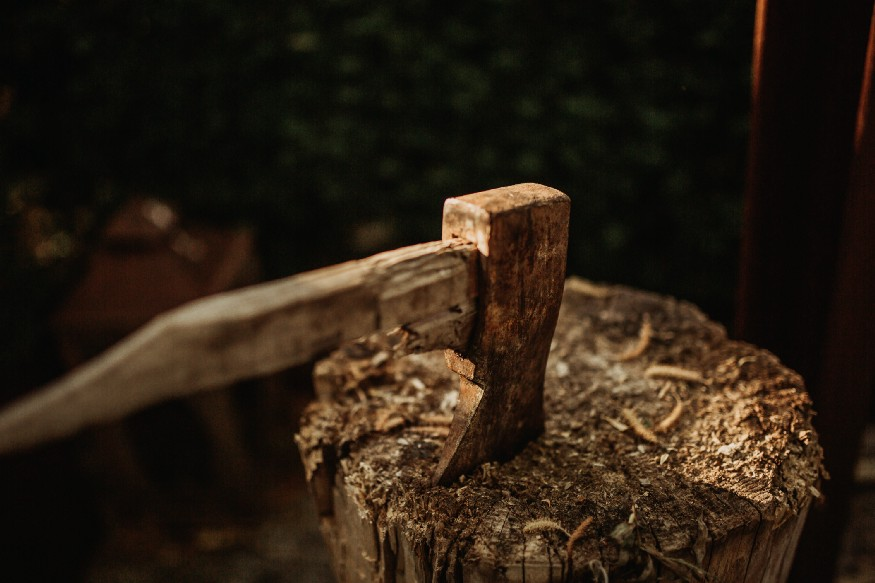

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=0)

In [ ]:
# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset 
print(X_test.shape, y_test.shape)

(6949, 75) (6949,)
(1738, 75) (1738,)


In [ ]:
# Fiting the model
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Data coefficients of dataset
reg.coef_

array([-9.88183490e+00,  7.75287690e-02,  2.16738318e+01,  5.70593355e+01,
       -1.78790235e+01, -1.59920667e+01,  9.57918709e+02, -9.49281055e+12,
       -8.73337371e-01,  2.43456834e+02,  9.93505130e+01, -4.27427129e+02,
        6.46099005e+11,  6.46099005e+11,  6.46099005e+11,  6.46099005e+11,
        6.46099005e+11,  6.46099005e+11,  6.46099005e+11,  6.46099005e+11,
        6.46099005e+11,  6.46099005e+11,  6.46099005e+11,  6.46099005e+11,
        6.46099005e+11,  6.46099005e+11,  6.46099005e+11,  6.46099005e+11,
        6.46099005e+11,  6.46099005e+11,  6.46099005e+11,  6.46099005e+11,
        6.46099005e+11,  6.46099005e+11,  6.46099005e+11,  6.46099005e+11,
       -1.19961247e+12,  7.94572140e+12,  2.40093767e+13,  2.35818010e+12,
        6.70547235e+10,  6.70547236e+10,  2.36278028e+12,  4.60737321e+12,
        1.12321643e+13, -6.20684328e+11,  1.15313273e+12, -1.28878523e+13,
       -9.19210109e+12, -1.03270402e+13,  9.13125236e+12,  3.36972800e+12,
        8.90658155e+11, -

In [ ]:
# Checking the predictor variables. 
y_pred = reg.predict(X_test)
y_pred

array([1176., -112.,  324., ...,   32., 1324., -520.])

# **Start building baseline models** 

# **Implementing Lasso Regression**

Lasso regression is the predictive model used to reduce the overfiting of the model. So from this we can make our better model or we reduce the residual from the data.

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7213475528230621

In [ ]:
lasso.score(X_test, y_test)

0.7094372424930092

**Provide the range of values to choose hyperparameters tuning**

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -105337.23308724808


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([1183.75470899, -103.08489306,  335.12222457, ...,   41.65370553,
       1333.83846097, -511.48186903])

In [ ]:
y_pred_lasso_train = lasso_regressor.predict(X_train)
y_pred_lasso_train 

array([-9.70818346e-01,  1.72705711e+03,  1.28953546e+03, ...,
        1.06190515e+03,  6.10869836e+02,  6.63762567e+02])

# Implement **Evaluation Metrics** For Lasso

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i| 
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
**Root Mean Squared Error (RMSE)**  is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [ ]:
MSE = mean_squared_error(y_test ,y_pred_lasso)
print("MSE :" , MSE)

MAE = mean_absolute_error(y_test ,y_pred_lasso)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,R2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 113009.1028367308
MAE : 256.3253365286566
RMSE : 336.1682656598192
R2 : 0.7094360157192614
Adjusted R2 :  0.6963239225657984


Text(0, 0.5, 'Predicted')

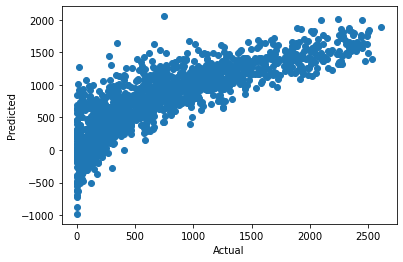

In [ ]:
plt.scatter(y_test,y_pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_lasso_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_lasso_train)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_lasso_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 103725.04389593937
RMSE : 322.06372645167505
R2 : 0.721347126103641
Adjusted R2 :  0.7087725379314227


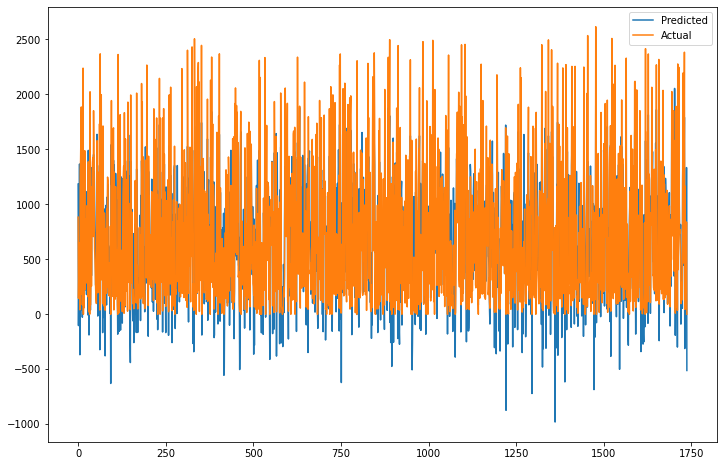

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing Ridge regression**

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).



In [ ]:
ridge  = Ridge(alpha=0.0001 , max_iter= 3000)

ridge.fit(X_train, y_train)

Ridge(alpha=0.0001, max_iter=3000)

In [ ]:
ridge.score(X_train, y_train)

0.7213475528596236

In [ ]:
ridge.score(X_test, y_test)

0.709437294644137

In [ ]:
# Cross Validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -105336.50613420834


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_ridge

array([1182.88808192, -103.18716756,  334.52309806, ...,   43.16254272,
       1332.73541725, -508.45649074])

In [ ]:
y_pred_ridge_train = ridge_regressor.predict(X_train)
y_pred_ridge_train

array([-7.13754199e-01,  1.72458292e+03,  1.28861162e+03, ...,
        1.06334328e+03,  6.11135468e+02,  6.62857115e+02])

# Evaluating metrics for Ridge

In [ ]:
MSE  = mean_squared_error(y_test ,y_pred_ridge)
print("MSE :" , MSE)

MAE = mean_absolute_error(y_test ,y_pred_ridge)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,R2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 113029.04859768937
MAE : 256.3046556504652
RMSE : 336.1979306862096
R2 : 0.7093847320648641
Adjusted R2 :  0.6962703246670692


In [ ]:
MSE  = mean_squared_error(y_train, y_pred_ridge_train)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

MAE = mean_absolute_error(y_train ,y_pred_ridge_train)
print("MAE :" ,MAE)

r2 = r2_score(y_train, y_pred_ridge_train)
print("R2 :",r2)
print("Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_ridge_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 103727.77152067421
RMSE : 322.0679610279082
MAE : 246.01959547809898
R2 : 0.7213397984569829
Adjusted R2 :  0.708764879614789


Text(0, 0.5, 'Predicted')

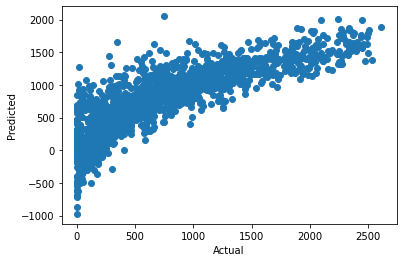

In [95]:
plt.scatter(y_test,y_pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Predicted')

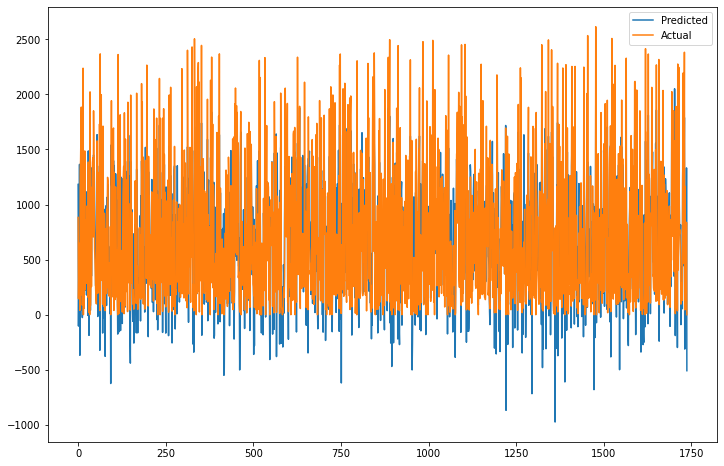

In [96]:
plt.figure(figsize=(12,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()